<IPython.core.display.Javascript object>


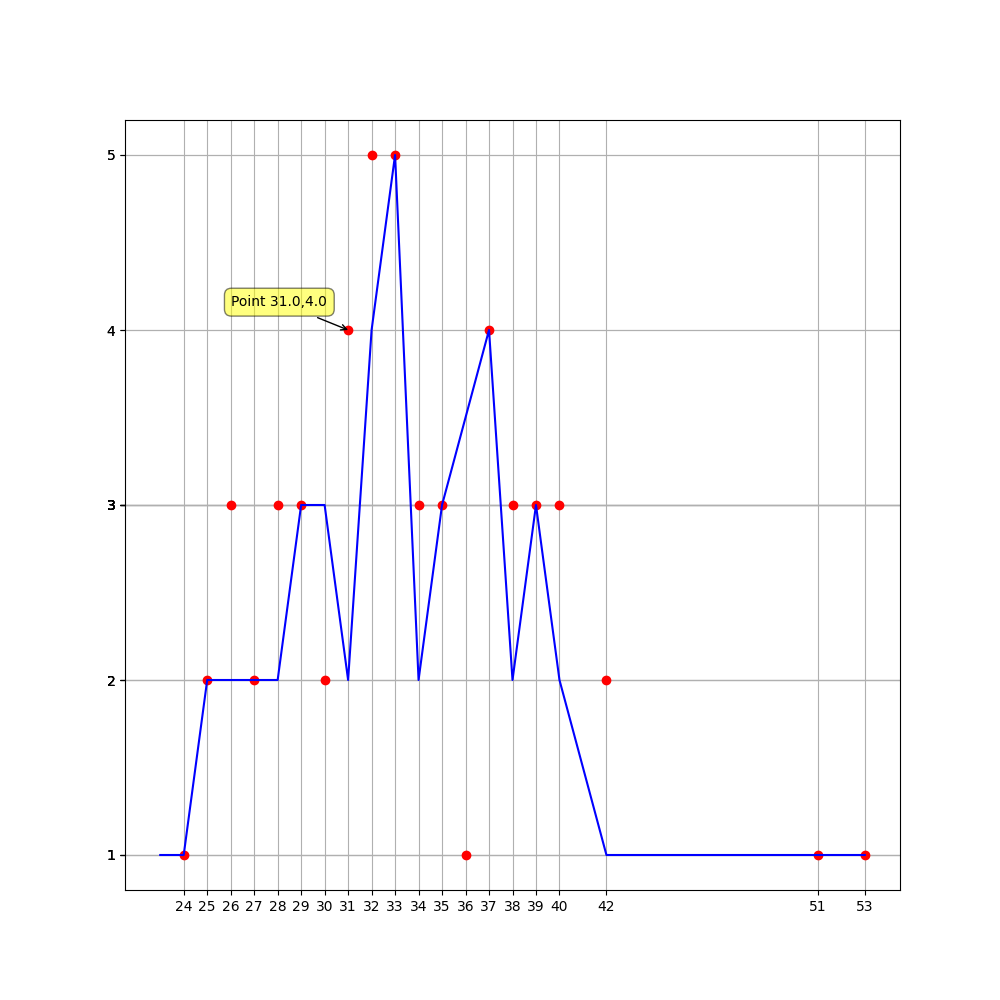

In [5]:
%matplotlib notebook
#!/usr/bin/python3

import io,re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import mplcursors
class Roblox:
    def __init__(self,stream):
        self.stream=stream
        self.instances=[]
    
    def set_instances(self):
        position=0
        size=0
        while(True):
            instance= self.get_INST(self.stream,position+size)

            stream=instance[0]
            position=instance[1]

            size=instance[2]
            if stream == None:
                break;
            self.instances.append([stream,position,size-16])
       



    def get_INST(self, stream ,position):
        regex= re.compile(b'INST')
        x = re.search(regex, stream[position:])
        if x == None :
            return (None,0,0)
        offset_match = x.start()
        
        current_position=position+offset_match
        size_of_inst_body = stream[current_position+4] 
        
        size_of_inst_header = 16
        size_of_inst = size_of_inst_header + size_of_inst_body
        rest_of_stream=stream[current_position:current_position+size_of_inst] 
        
        return [rest_of_stream ,current_position, size_of_inst]



def update_annot(ind):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def on_plot_hover(event):
    # Iterating over each data member plotted
    for curve in plot.get_lines():
        # Searching which data member corresponds to current mouse position
        if curve.contains(event)[0]:
            print("over %s" % curve.get_gid())

def get_bytes(f):
    with open(f,"rb") as bin_file:
        data = bin_file.read()
    return data


if __name__=="__main__" :
    mojo_stream_1=get_bytes("/root/Desktop/Obby.rbxl")
    mojo_stream_2=get_bytes("/root/Desktop/Baseplate.rbxl")

    rbx1 = Roblox(mojo_stream_1)
    rbx1.set_instances()
    rbx2 = Roblox(mojo_stream_2)
    rbx2.set_instances()
    counts = []
    count1 = []


    is_b=0
    a_b=["a","b"]
    for instances in (rbx1.instances, rbx2.instances):
        for inst in instances:            
            
            instance_size_seen=False
            
            for i in range(0,len(counts)):
                if(inst[2] == counts[i][1]):

                    counts[i][0]+=1
                    counts[i][2]+=a_b[is_b]
                    counts[i][3].append(inst[1])
                    instance_size_seen=True
                    break;

            if not instance_size_seen:
                counts.append([1,inst[2],a_b[is_b],[inst[1]]])
        if not is_b:
            count1 = counts
            counts= []
        is_b =1
    sorted_counts=sorted(counts, key=lambda x: x[1], reverse=True)
    sorted_count1=sorted(count1, key=lambda x: x[1], reverse=True)
    x = []
    y = []
    for count in sorted_count1:
        x.append(count[1])
        y.append(count[0])
        
    a = []
    b = []
    for count in sorted_counts:
        a.append(count[1])
        b.append(count[0])
        
    
    mojo_fig=plt.figure(figsize=(10,10))
    ax=mojo_fig.add_subplot(111)
    points=ax.plot(x,y,'ro')
    lines=ax.plot(a,b,'b')
    plt.grid(True)
    plt.xticks(x)
    plt.yticks(y)
    crs = mplcursors.cursor(points)

    crs.connect("add", lambda sel: sel.annotation.set_text(
        'Point {},{}'.format(sel.target[0], sel.target[1])))
    

    #mojo_fig.canvas.mpl_connect("motion_notify_event", on_plot_hover)
    

    plt.show()

